<a href="https://colab.research.google.com/github/Idris-Kagdi/Data-Science-and-Machine-Learning/blob/main/Face%20Smile%20Classification%20using%20Pre-trained%20Transfer%20Learning%20Convolutional%20Neural%20Network%20(CNN)%20Model%20ResNet-50/Idris_Kagdi_DS_IBY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
from tensorflow.keras.models import Model
import time

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score
import shutil

## Mounting Google Drive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading .csv train and test files by pandas and allocating classes as 0 for negative smile, 1 for positive smile and 2 for NOT smile.

In [ ]:
for e, i in enumerate(["a", "b", "c"]):
  print(e, i)

0 a
1 b
2 c


In [ ]:
for i in ["a", "b", "c"]:
  print(i)

a
b
c


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Data_set/train.csv',names=['ID','Labels'])
test=pd.read_csv('/content/drive/MyDrive/Data_set/test.csv',names=['ID','Labels'])

In [ ]:
encoding_map={label:i for i, label in enumerate(train.Labels.unique())}
train.Labels= train.Labels.map(encoding_map)
test.Labels= test.Labels.map(encoding_map)
train.head()

,ID,Labels
0,05684c70-113d-4894-920e-140edf323528,0
1,0403faa2-2d45-4779-b40a-794c220d3855,1
2,1ba6784e-3684-4f76-81b7-504610a497e1,1
3,675c87fb-bf50-481e-949d-07b5dc14b589,1
4,02567fbb-1147-4186-8d7d-38611569fc06,2


In [ ]:
encoding_map

{'NOT smile': 2, 'negative smile': 0, 'positive smile': 1}

In [ ]:
{label:i for i, label in enumerate(train.Labels.unique())}

In [ ]:
train.Labels.unique()

array(['negative smile', 'positive smile', 'NOT smile'], dtype=object)

In [ ]:
train.Labels.value_counts(normalize=True)

2    0.694680
1    0.204513
0    0.100807
Name: Labels, dtype: float64

In [ ]:
test.Labels.value_counts(normalize=True)

2    0.700186
1    0.211049
0    0.088765
Name: Labels, dtype: float64

In [ ]:
train

,ID,Labels
0,05684c70-113d-4894-920e-140edf323528,0
1,0403faa2-2d45-4779-b40a-794c220d3855,1
2,1ba6784e-3684-4f76-81b7-504610a497e1,1
3,675c87fb-bf50-481e-949d-07b5dc14b589,1
4,02567fbb-1147-4186-8d7d-38611569fc06,2
...,...,...
4826,05af094f-def8-462d-b3f3-e78ac78e886c,2
4827,132d33cc-320e-4a00-a0c0-2328bf4bc138,2
4828,0ea41692-1b58-475f-83d4-a2273d2776a1,1
4829,05277d67-d9e3-41f0-a3be-8ee090caea2b,2


In [ ]:
for ind, row in train.iterrows():
  print( row)
  if ind ==4:
    break

ID        05684c70-113d-4894-920e-140edf323528
Labels                                       0
Name: 0, dtype: object
ID        0403faa2-2d45-4779-b40a-794c220d3855
Labels                                       1
Name: 1, dtype: object
ID        1ba6784e-3684-4f76-81b7-504610a497e1
Labels                                       1
Name: 2, dtype: object
ID        675c87fb-bf50-481e-949d-07b5dc14b589
Labels                                       1
Name: 3, dtype: object
ID        02567fbb-1147-4186-8d7d-38611569fc06
Labels                                       2
Name: 4, dtype: object


In [ ]:

!mkdir -p "/content/drive/MyDrive/home/train/0"
!mkdir -p "/content/drive/MyDrive/home/train/1"
!mkdir -p "/content/drive/MyDrive/home/train/2"

!mkdir -p "/content/drive/MyDrive/home/test/0"
!mkdir -p "/content/drive/MyDrive/home/test/1"
!mkdir -p "/content/drive/MyDrive/home/test/2"


for ind, row in tqdm(train.iterrows()):
    try:
        name = row["ID"]+".jpg"
        label = row["Labels"]
        src1= "/content/drive/MyDrive/happy_images/"+name
        dst1 = "/content/drive/MyDrive/home/train/"+f"{label}"
        shutil.copy(src1, dst1)

    except FileNotFoundError as e:
        print(ind)
        continue


for ind, row in tqdm(test.iterrows()):
    try:
        name = row["ID"]+".jpg"
        label = row["Labels"]
        src2= "/content/drive/MyDrive/happy_images/"+name
        dst2 = "/content/drive/MyDrive/home/test/"+f"{label}"
        shutil.copy(src2, dst2)

    except FileNotFoundError as e:
        print(ind)
        continue

In [ ]:


import os
os.path.exists('/content/drive/MyDrive/Data_set/happy_images/'+train["ID"][0]+".jpg")

True

# Image Augmentation

In [ ]:
train_loader = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=False,
    # shear_range=0.01,
    # featurewise_center=False, samplewise_center=False,
    # featurewise_std_normalization=False, samplewise_std_normalization=False,
    # zca_whitening=False, zca_epsilon=1e-06,  width_shift_range=0.0,
    # height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    # channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    # horizontal_flip=False, vertical_flip=False, rescale=None,
    # preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

test_loader = ImageDataGenerator(
    rescale=1./255,)
 


target_size = (224,224)
batch_size = 16 #experiment
train_generator = train_loader.flow_from_directory(
        "/content/drive/MyDrive/home/train",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')


validation_generator = test_loader.flow_from_directory(
        "/content/drive/MyDrive/home/test/",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 4831 images belonging to 3 classes.
Found 1621 images belonging to 3 classes.


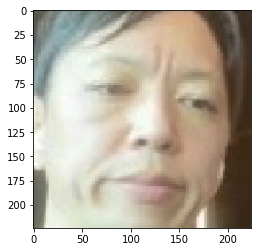

In [ ]:
plt.imshow(next(validation_generator)[0][0])

In [ ]:
a = ["a", "b", "c"]

In [ ]:
ita = iter(a)

In [ ]:
next(ita)

StopIteration: ignored

In [ ]:
for i in a:
  

In [ ]:
import time

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()


#Callback

checkpoint_filepath = f'/content/drive/MyDrive/home/{time.time()}checkpoint.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
train.Labels.value_counts()

2    3356
1     988
0     487
Name: Labels, dtype: int64

##Transfer Learning Below by using ResNet50 Model

Epoch 1/15
301/301 [==============================] - 163s 514ms/step - loss: 3.3276 - accuracy: 0.6762 - recall_1: 0.5562 - precision_1: 0.6999 - val_loss: 2.9903 - val_accuracy: 0.7031 - val_recall_1: 0.7031 - val_precision_1: 0.7031
Epoch 2/15
301/301 [==============================] - 150s 496ms/step - loss: 0.7482 - accuracy: 0.7350 - recall_1: 0.6687 - precision_1: 0.7632 - val_loss: 1.3382 - val_accuracy: 0.7000 - val_recall_1: 0.7000 - val_precision_1: 0.7000
Epoch 3/15
301/301 [==============================] - 153s 509ms/step - loss: 0.6728 - accuracy: 0.7599 - recall_1: 0.7105 - precision_1: 0.7978 - val_loss: 1.2041 - val_accuracy: 0.7119 - val_recall_1: 0.7081 - val_precision_1: 0.7135
Epoch 4/15
301/301 [==============================] - 154s 509ms/step - loss: 0.6315 - accuracy: 0.7763 - recall_1: 0.7298 - precision_1: 0.8074 - val_loss: 0.5646 - val_accuracy: 0.7912 - val_recall_1: 0.7556 - val_precision_1: 0.8247
Epoch 5/15
301/301 [==============================] - 14

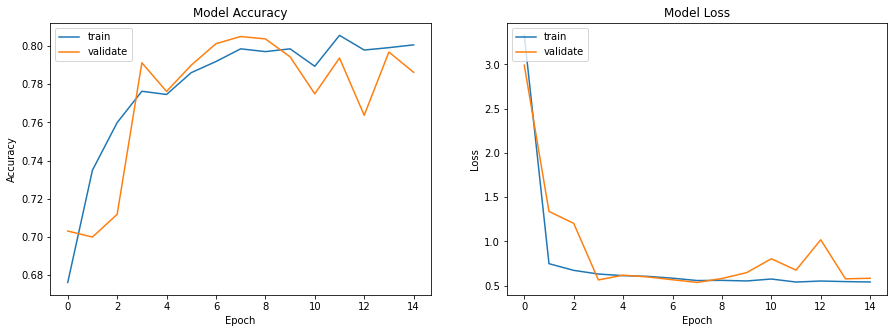

In [ ]:
#Add classification nodes
base_model = tf.keras.applications.ResNet50(
    # include_top=False,
    include_top=False,
    weights="imagenet",
    # weights=None,
    input_tensor=None,
    input_shape= (224, 224, 3),
    pooling=None
)

flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1) #experiment
output = Dense(3, activation='softmax')(class1)
# tensorflow functional layers api
# define new model
model = Model(inputs=base_model.inputs, outputs=output)

opt = keras.optimizers.Adam(learning_rate=0.001,)#experiment


model.compile(loss="categorical_crossentropy",optimizer=opt,
               metrics=["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])


history = model.fit(train_generator,
           validation_data = validation_generator,
           epochs=15,
           steps_per_epoch=(len(train)//batch_size),
           validation_steps=(len(test)//batch_size),
           
           callbacks=[model_checkpoint_callback]
            )
print(history.history.keys())
plotmodelhistory(history)



In [ ]:
base_model = tf.keras.applications.ResNet50(
    # include_top=False,
    include_top=False,
    weights="imagenet",
    # weights=None,
    input_tensor=None,
    input_shape= (224, 224, 3),
    pooling=None
)

flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1) #experiment
output = Dense(3, activation='softmax')(class1)
# tensorflow functional layers api
# define new model
model = Model(inputs=base_model.inputs, outputs=output)
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             